In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

# Features engieneering

In [225]:
users = pd.read_csv('../data/train_users_2.csv')
# test_users = pd.read_csv('../data/test_users.csv')
sessions = pd.read_csv('../data/sessions.csv')
# ages = pd.read_csv('../data/age_gender_bkts.csv')
# countries = pd.read_csv('../data/countries.csv')
user_ids = set(sessions.user_id.values).intersection(users.id.values)

In [226]:
from datetime import datetime

def days_between(d1, d2, t1="%Y-%m-%d", t2="%Y-%m-%d"):
    d1 = datetime.strptime(d1, t1)
    d2 = datetime.strptime(d2, t2)
    return abs((d2 - d1).days)

In [227]:
users['month_account_created'] = users.apply(lambda r: int(r['date_account_created'].split('-')[1]), axis=1)

In [228]:
users['target'] = users.apply(lambda r: 1 if r['country_destination'] != 'NDF' else 0, axis=1)

In [229]:
data = pd.concat([users[users['target'] == 1].head(88000), users[users['target'] == 0].head(88000)])
data

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,month_account_created,target
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,9,1
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,12,1
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,9,1
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,other,omg,Web,Mac Desktop,Chrome,US,1,1
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,craigslist,untracked,Web,Mac Desktop,Safari,US,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154116,6mvrjolxfk,2014-02-18,20140218055331,NaN,-unknown-,NaN,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,NDF,2,0
154118,acdq94b5oo,2014-02-18,20140218055604,NaN,-unknown-,NaN,basic,0,en,sem-non-brand,google,omg,Web,iPad,Chrome Mobile,NDF,2,0
154119,pcqkta8etp,2014-02-18,20140218055939,NaN,-unknown-,NaN,basic,25,en,direct,direct,untracked,iOS,iPhone,-unknown-,NDF,2,0
154121,ykxgog2ws0,2014-02-18,20140218060032,NaN,MALE,29.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,2,0


In [230]:
data['null_age'] = data['age'].isnull().astype(int)
data['age_correct'] = ((0 < data['age']) & (data['age'] < 100)).astype(int)
data['age_100'] = ((100 < data['age']) & (data['age'] < 2000)).astype(int)

In [231]:
data['gender_unknown'] = (data['gender'] == '-unknown-').astype(int)

In [232]:
data['aff_channel_api'] = (data['affiliate_channel'] == 'api').astype(int)
data['aff_channel_content'] = (data['affiliate_channel'] == 'content').astype(int)
data['aff_channel_other'] = (data['affiliate_channel'] == 'other').astype(int)

In [233]:
data['first_dev_type_mac'] = (data['first_device_type'] == 'Mac').astype(int)
data['first_dev_type_unknown'] = (data['first_device_type'] == 'Other/Unknown').astype(int)

In [234]:
data['created_account_spring'] = ((3 <= data['month_account_created']) & (data['month_account_created'] <= 6)).astype(int)
data['created_account_cold'] = ((7 <= data['month_account_created']) | (data['month_account_created'] <= 1)).astype(int)

In [235]:
data['signup_method_facebook'] = (data['signup_method'] == 'facebook').astype(int)

In [236]:
data['signup_flow_start'] = (data['signup_flow'] <= 1).astype(int)
data['signup_flow_middle'] = ((20 > data['signup_flow']) & (data['signup_flow'] > 1)).astype(int)
data['signup_flow_end'] = (data['signup_flow'] >= 20).astype(int)

In [237]:
data

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,...,aff_channel_content,aff_channel_other,first_dev_type_mac,first_dev_type_unknown,created_account_spring,created_account_cold,signup_method_facebook,signup_flow_start,signup_flow_middle,signup_flow_end
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,...,0,0,0,0,0,1,0,0,1,0
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,...,0,0,0,0,0,1,1,1,0,0
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,...,0,0,0,0,0,1,0,1,0,0
5,osr2jwljor,2010-01-01,20100101215619,2010-01-02,-unknown-,NaN,basic,0,en,other,...,0,1,0,0,0,1,0,1,0,0
6,lsw9q7uk0j,2010-01-02,20100102012558,2010-01-05,FEMALE,46.0,basic,0,en,other,...,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154116,6mvrjolxfk,2014-02-18,20140218055331,NaN,-unknown-,NaN,basic,0,en,direct,...,0,0,0,0,0,0,0,1,0,0
154118,acdq94b5oo,2014-02-18,20140218055604,NaN,-unknown-,NaN,basic,0,en,sem-non-brand,...,0,0,0,0,0,0,0,1,0,0
154119,pcqkta8etp,2014-02-18,20140218055939,NaN,-unknown-,NaN,basic,25,en,direct,...,0,0,0,0,0,0,0,0,0,1
154121,ykxgog2ws0,2014-02-18,20140218060032,NaN,MALE,29.0,basic,0,en,direct,...,0,0,0,0,0,0,0,1,0,0


In [238]:
data = data.sample(frac=1)

In [239]:
n = int(data.shape[0] * 0.7)
matrix_data = data.loc[:, 'null_age':].values

X_train = matrix_data[:n, :]
y_train = data['target'].values[:n]

X_test = matrix_data[n:, :]
y_test = data['target'].values[n:]

In [240]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.684646124126437

In [241]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=99, max_depth=20)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6918240184844984

In [242]:
model.feature_importances_

array([0.20461802, 0.22127455, 0.0085677 , 0.07287103, 0.01778254,
       0.02218364, 0.01550627, 0.        , 0.03418225, 0.10963066,
       0.07626824, 0.16339712, 0.01280647, 0.01879007, 0.02212145])

## Where does my models get errors ?

In [243]:
pred = model.predict(X_test)

In [244]:
df = data.tail(data.shape[0] - n).copy().reset_index()

In [245]:
df['prediction'] = pred
df

,index,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,...,aff_channel_other,first_dev_type_mac,first_dev_type_unknown,created_account_spring,created_account_cold,signup_method_facebook,signup_flow_start,signup_flow_middle,signup_flow_end,prediction
0,43326,poq2v7tb94,2012-10-02,20121002214704,NaN,-unknown-,NaN,basic,0,en,...,0,0,0,0,1,0,1,0,0,0
1,174565,3f37i3ii7d,2014-04-11,20140411195835,2014-04-21,FEMALE,54.0,basic,0,en,...,0,0,0,1,0,0,1,0,0,1
2,19436,5dx9q9ilmd,2012-03-21,20120321152718,NaN,FEMALE,NaN,basic,15,en,...,1,0,1,1,0,0,0,1,0,1
3,46497,2tc3e5d1kj,2012-10-29,20121029032857,2012-10-30,MALE,54.0,facebook,0,en,...,1,0,0,0,1,1,1,0,0,0
4,112993,6c1tj69ah8,2013-09-30,20130930230711,2013-11-08,MALE,33.0,basic,0,en,...,0,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52796,19313,2mnmbl6jdu,2012-03-19,20120319224008,2012-03-19,-unknown-,NaN,basic,3,en,...,0,0,0,1,0,0,0,1,0,1
52797,164931,b789vi87qu,2014-03-19,20140319001755,2014-03-19,MALE,37.0,basic,0,en,...,0,0,0,1,0,0,1,0,0,1
52798,49341,0jyz29pv10,2012-11-20,20121120235035,NaN,-unknown-,NaN,basic,0,en,...,0,0,0,0,1,0,1,0,0,0
52799,148726,1891pp7uwg,2014-02-03,20140203033538,NaN,MALE,31.0,facebook,12,en,...,0,0,1,0,0,1,0,1,0,0


In [246]:
errors = df[df['prediction'] != df['target']].copy().reset_index()
errors.loc[:,:'target']

,level_0,index,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,month_account_created,target
0,2,19436,5dx9q9ilmd,2012-03-21,20120321152718,NaN,FEMALE,NaN,basic,15,en,other,other,NaN,Web,Other/Unknown,-unknown-,NDF,3,0
1,3,46497,2tc3e5d1kj,2012-10-29,20121029032857,2012-10-30,MALE,54.0,facebook,0,en,other,other,tracked-other,Web,Mac Desktop,Firefox,US,10,1
2,6,136859,yjtahdrt8w,2013-12-31,20131231081238,NaN,MALE,43.0,basic,0,en,sem-brand,google,omg,Web,Android Tablet,IE,NDF,12,0
3,8,60984,mp4r2lbq03,2013-02-18,20130218063332,NaN,FEMALE,34.0,basic,0,en,direct,direct,omg,Web,Mac Desktop,Safari,NDF,2,0
4,9,148200,rnabb6ug5t,2014-02-01,20140201051803,NaN,FEMALE,62.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,NDF,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16267,52789,136751,uzjsri5gz8,2013-12-31,20131231011502,NaN,-unknown-,34.0,basic,0,en,direct,direct,linked,Web,Mac Desktop,Safari,NDF,12,0
16268,52792,23292,s0474sqhwq,2012-05-05,20120505195918,NaN,MALE,25.0,facebook,0,en,sem-non-brand,google,omg,Web,Mac Desktop,Safari,NDF,5,0
16269,52794,102830,4dkctk2j8j,2013-08-27,20130827182500,2013-08-27,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,US,8,1
16270,52795,72429,qymizpk3g2,2013-04-22,20130422210133,NaN,MALE,39.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,NDF,4,0


In [247]:
errors.columns

Index(['level_0', 'index', 'id', 'date_account_created',
       'timestamp_first_active', 'date_first_booking', 'gender', 'age',
       'signup_method', 'signup_flow', 'language', 'affiliate_channel',
       'affiliate_provider', 'first_affiliate_tracked', 'signup_app',
       'first_device_type', 'first_browser', 'country_destination',
       'month_account_created', 'target', 'null_age', 'age_correct', 'age_100',
       'gender_unknown', 'aff_channel_api', 'aff_channel_content',
       'aff_channel_other', 'first_dev_type_mac', 'first_dev_type_unknown',
       'created_account_spring', 'created_account_cold',
       'signup_method_facebook', 'signup_flow_start', 'signup_flow_middle',
       'signup_flow_end', 'prediction'],
      dtype='object')

(16272, 36)

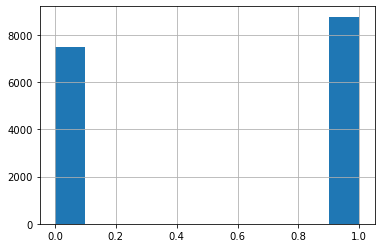

In [248]:
errors['target'].hist()
errors.shape

In [249]:
balanced_errors_df = errors[errors['target'] == 1].head(min(errors[errors['target'] == 1].shape[0], errors[errors['target'] == 0].shape[0]))
balanced_errors_ndf = errors[errors['target'] == 0].head(min(errors[errors['target'] == 1].shape[0], errors[errors['target'] == 0].shape[0]))
balanced_errors = pd.concat([balanced_errors_df, balanced_errors_ndf]).sample(frac=1).drop(['level_0', 'index'], axis=1).reset_index()

target,0,1
signup_flow,,
0,5421,6467
1,137,8
2,547,175
3,708,216
5,2,1
6,25,5
8,15,1
12,133,443
15,1,0


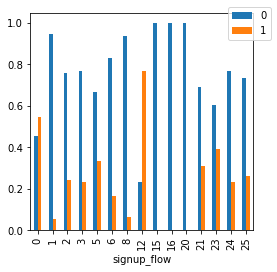

In [250]:
tmp = pd.crosstab(balanced_errors['signup_flow'], balanced_errors['target'])
tmp.div(tmp.sum(1).astype(float), axis=0).plot(kind="bar", stacked=False, figsize=(4,4))
plt.legend(bbox_to_anchor=(1.1, 1.05))
tmp

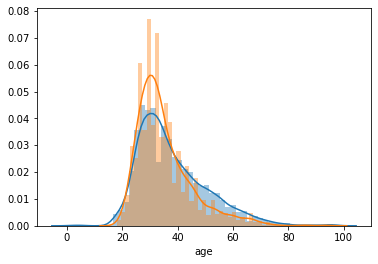

In [251]:
sns.distplot(balanced_errors[(balanced_errors['age'] < 100) & (balanced_errors['target'] == 0)]['age'])
sns.distplot(balanced_errors[(balanced_errors['age'] < 100) & (balanced_errors['target'] == 1)]['age'])